In [5]:
#imports
import os
import requests
import pandas as pd
import json
import hvplot.pandas
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import PIL as PIL
from PIL import ImageDraw
from PIL import Image
from PIL import ImageFont
import panel as pn
from pathlib import Path
import holoviews as hv
from holoviews import opts
from dotenv import load_dotenv
from matplotlib import rcParams

%matplotlib "inline"

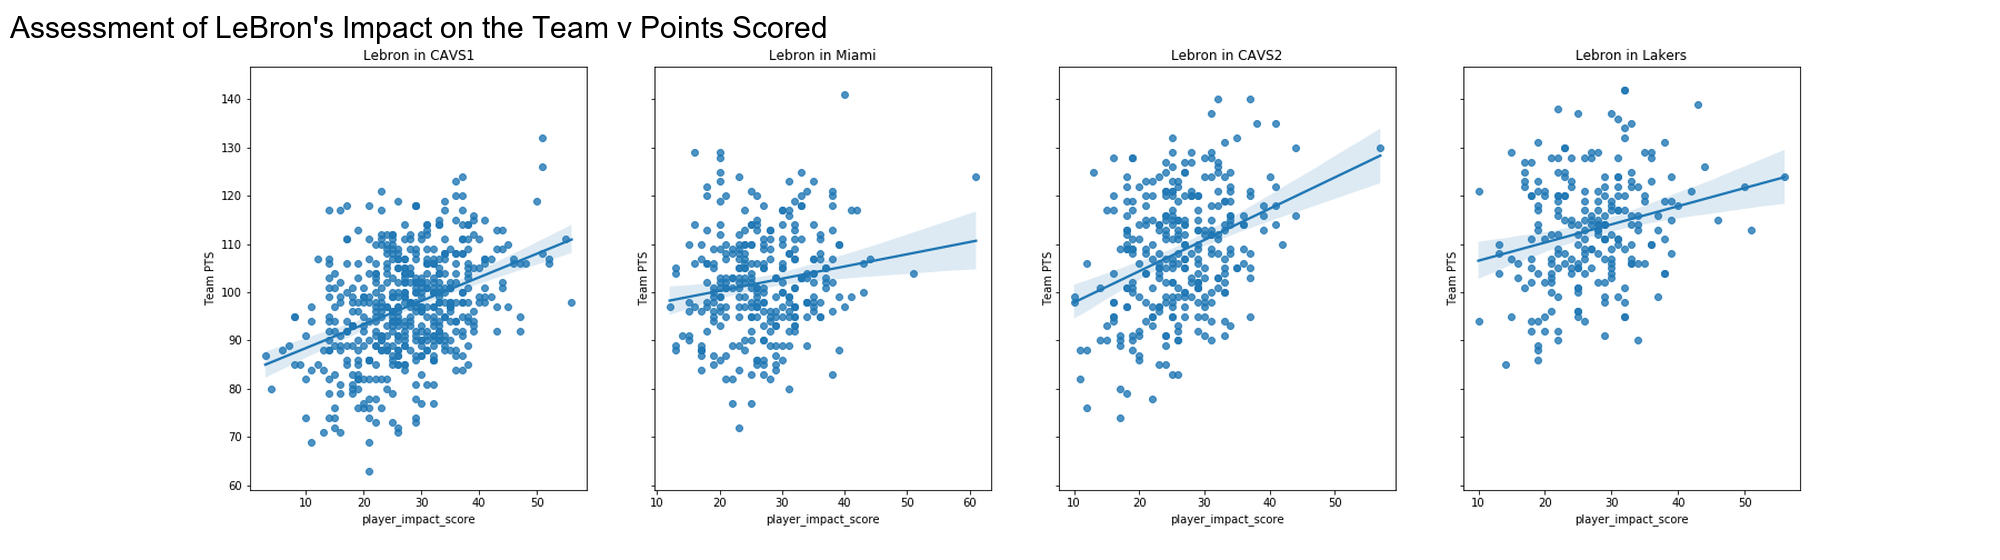

In [49]:
#read in all team stats csv
allteamstatscsv = Path("Resources\All Team Stats with and without LeBron.csv")
allteamstats = pd.read_csv(allteamstatscsv, index_col="Year")

#read in cavs 1 csv
cavs1csv = Path("Resources\Cavs 1 with LeBron.csv")
cavs_1_w_lebron = pd.read_csv(cavs1csv, index_col="Year")
cavs2csv = Path("Resources\Cavs 1 without LeBron.csv")
cavs_1_wo_lebron = pd.read_csv(cavs2csv, index_col = "Year")

#read in cavs 2 cavs
cavs3csv = Path("Resources\Cavs 2 with LeBron.csv")
cavs_2_w_lebron = pd.read_csv(cavs3csv, index_col="Year")
cavs4csv = Path("Resources\Cavs 2 without LeBron.csv")
cavs_2_wo_lebron = pd.read_csv(cavs4csv, index_col = "Year")

#read in heat csv
heat1csv = Path("Resources\Heat with LeBron.csv")
heat_w_lebron = pd.read_csv(heat1csv, index_col="Year")
heat2csv = Path("Resources\Heat without LeBron.csv")
heat_wo_lebron = pd.read_csv(heat2csv, index_col = "Year")

#read in lakers csv
lakers1csv = Path("Resources\Lakers with LeBron.csv")
lakers_w_lebron = pd.read_csv(lakers1csv, index_col="Year")
lakers2csv = Path("Resources\Lakers without LeBron.csv")
lakers_wo_lebron = pd.read_csv(lakers2csv, index_col = "Year")

#import impact score charts from image
basewidth = 2000
img = Image.open('Resources/impact_score.png')
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), Image.ANTIALIAS)
draw = PIL.ImageDraw.Draw(img)
font = ImageFont.truetype("arial.ttf", size = 30)
draw.text((10, 10),"Assessment of LeBron's Impact on the Team v Points Scored", font=font, fill=(0, 0, 0))
img

In [7]:
#sample dataframe
allteamstats.head()

,Mean PTS,Sum PTS,WR,Win Counts,Team Name
Year,,,,,
1999,90.97,7187,43.04,34,Cleveland Caveliers 1
2000,94.44,7650,44.44,36,Cleveland Caveliers 1
2001,92.27,7751,30.95,26,Cleveland Caveliers 1
2002,94.58,8039,27.06,23,Cleveland Caveliers 1
2003,92.10,4513,22.45,11,Cleveland Caveliers 1


In [46]:
#plot total wins v total points for games
wins_v_points = allteamstats.hvplot.scatter(x = 'Sum PTS',
                                           y = 'Win Counts',
                                           xlabel = 'Total Points Scored',
                                           ylabel = 'Total Games Won',
                                          width = 1000,
                                          height = 500,
                                           title = "Total Wins v Total Points Scored"
                                          )

#Plot team dataframes for comparison
cavs1_plot = pd.concat([cavs_1_wo_lebron, cavs_1_w_lebron])
cavs1_plots = cavs1_plot.hvplot.bar(x = "Year", 
                                    y = 'Mean PTS', 
                                    ylabel = 'Average Points', 
                                    title = 'Average Points Scored by Cavaliers 1999 - 2010 with LeBron v without LeBron', 
                                    color = 'Team Name', 
                                    cmap = ['maroon', 'navy'],
                                    width = 1000
                                   ).opts(axiswise=True)

cavs2_plot = pd.concat([cavs_2_wo_lebron, cavs_2_w_lebron])
cavs2_plots = cavs2_plot.hvplot.bar(x = "Year", 
                                    y = "Mean PTS", 
                                    ylabel = 'Average Points', 
                                    title = 'Average Points Scored by Cavaliers 2007 - 2018 with LeBron v without LeBron', 
                                    color = 'Team Name', 
                                    cmap = ['black', 'gold'],
                                   width = 1000).opts(axiswise=True)

heat_plot = pd.concat([heat_wo_lebron, heat_w_lebron])
heat_plots = heat_plot.hvplot.bar(x = "Year", 
                                  y = "Mean PTS", 
                                  ylabel = 'Average Points', 
                                  title = 'Average Points Scored by Heat with LeBron v without LeBron', 
                                  color = 'Team Name', 
                                  cmap = ['black', 'red'],
                                 width = 1000).opts(axiswise=True)

lakers_plot = pd.concat([lakers_wo_lebron, lakers_w_lebron])
lakers_plots = lakers_plot.hvplot.bar(x = "Year", 
                                      y = "Mean PTS", 
                                      ylabel = 'Average Points', 
                                      title = 'Average Points Scored by Lakers with LeBron v without LeBron', 
                                      color = 'Team Name', 
                                      cmap = ['purple', 'gold'],
                                     width = 1000).opts(axiswise=True)
cavs1_and_2 = pn.Row(
        cavs1_plots,
        cavs2_plots,
        )

heat_and_lakers = pn.Row(
        heat_plots,
        lakers_plots
        )
#lay the team graphs out in a grid
gspec = pn.GridSpec(sizing_mode = 'stretch_both', width = 250, height= 250)
gspec[3, 1] = cavs1_and_2
gspec[4, 1] = heat_and_lakers

#Create winrate dropdown plot
winrate_plot = allteamstats.hvplot.line(groupby = "Team Name",
                                        x='Year',
                                        y='WR',
                                        title = "Team's Yearly Winrate%", 
                                        xlabel="Year",
                                        ylabel="Win Rate",
                                        rot=90,
                                        height=400, 
                                        width=500,
                                        color= 'gold')
#create plot to show total points scored.
sum_plot = allteamstats.hvplot.bar(x = 'Year', 
                                   y = 'Sum PTS',
                                   title="Team's Yearly Total Points Scored", 
                                   xlabel="Year",
                                   ylabel="Sum PTS",
                                   groupby = "Team Name", 
                                   rot=90,
                                   height=400, 
                                   width=500,
                                   color='red')


#combine
dashboard = pn.Tabs(
    pn.pane.Markdown(
        """#ANALYSIS OF LEBRON JAMES' IMPACT ON BASKETBALL
        This dashboard seeks to answer whether more points scored means more Basketball games won. 
        It does this through an analysis of a number of metrics to determine the impact LeBron James has had on the various teams he has played with throughout his career.""",
        style={'color':'black','font-family': "serif"}),
    ("Total Wins v Total Points Scored", wins_v_points),
    ("Total Points Scored with v without LeBron", sum_plot),
    ("Average Points Scored by Teams with v without LeBron",gspec),
    ("Team Win Rate with v without LeBron",winrate_plot),
    ("Impact Score Analysis", img)
   )


In [45]:
#run dashboard
dashboard.show()

Launching server at http://localhost:55141
